In [1]:
# 图像分析与理解
# 图像配准实验 - Harris角点
# 东南大学，卓旭，212138

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

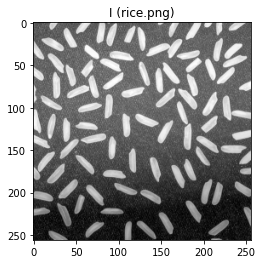

In [3]:
I = np.array(Image.open('rice.png'), dtype=np.uint8)
plt.figure()
plt.imshow(I, cmap='gray'); plt.title('I (rice.png)')
plt.show()

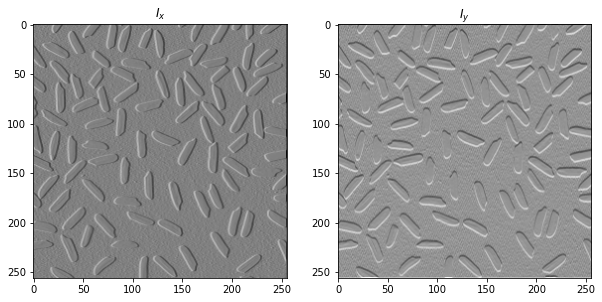

In [4]:
I = I.astype(np.float32)
Gx = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
], dtype=np.float32) / 2
Gy = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, -1, 0]
], dtype=np.float32) / 2
Ix = cv2.filter2D(I, -1, Gx, borderType=cv2.BORDER_CONSTANT)
Iy = cv2.filter2D(I, -1, Gy, borderType=cv2.BORDER_CONSTANT)
plt.figure(figsize=(10, 6))
plt.subplot(121); plt.imshow(Ix, cmap='gray'); plt.title(r'$I_x$')
plt.subplot(122); plt.imshow(Iy, cmap='gray'); plt.title(r'$I_y$')
plt.show()

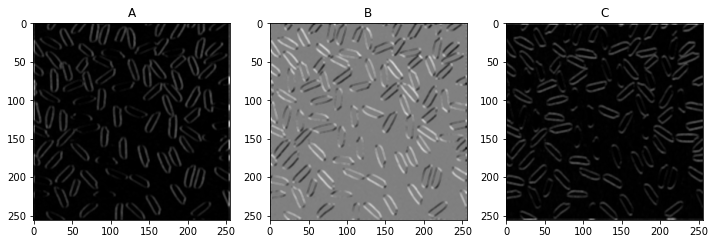

In [5]:
S = np.ones((3, 3))
Ixx = Ix ** 2; Ixy = Ix * Iy; Iyy = Iy ** 2
IxxSum = cv2.filter2D(Ixx, -1, S, borderType=cv2.BORDER_CONSTANT)
IxySum = cv2.filter2D(Ixy, -1, S, borderType=cv2.BORDER_CONSTANT)
IyySum = cv2.filter2D(Iyy, -1, S, borderType=cv2.BORDER_CONSTANT)
plt.figure(figsize=(12, 6))
plt.subplot(131); plt.imshow(IxxSum, cmap='gray'); plt.title(r'A')
plt.subplot(132); plt.imshow(IxySum, cmap='gray'); plt.title(r'B')
plt.subplot(133); plt.imshow(IyySum, cmap='gray'); plt.title(r'C')
plt.show()

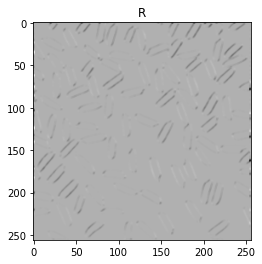

In [6]:
k = 0.02
R = ((IxxSum * IxySum) - (IxySum ** 2)) - k * ((IxxSum + IyySum) ** 2)
plt.figure()
plt.imshow(R, cmap='gray'); plt.title(r'R')
plt.show()

In [10]:
Rmax = np.max(R[2:-2, 2:-2])
Rmax, 0.2 * Rmax

(23163878.0, 4632775.600000001)

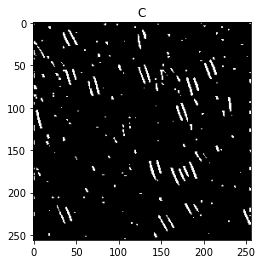

In [12]:
C = R.copy()
C[C <= 0.2 * Rmax] = 0
C[C > 0] = 1
plt.figure()
plt.imshow(C, cmap='gray'); plt.title(r'C')
plt.show()

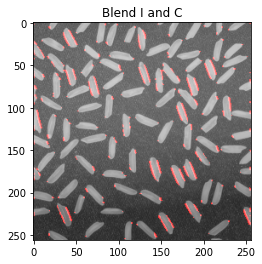

In [33]:
blend = np.array([np.clip(I + C * 255, 0, 255), I, I]).astype(np.uint8)
plt.figure()
plt.imshow(Image.fromarray(blend.transpose((1, 2, 0)), mode='RGB')); plt.title('Blend I and C')
plt.show()

In [ ]:
cv2.corner